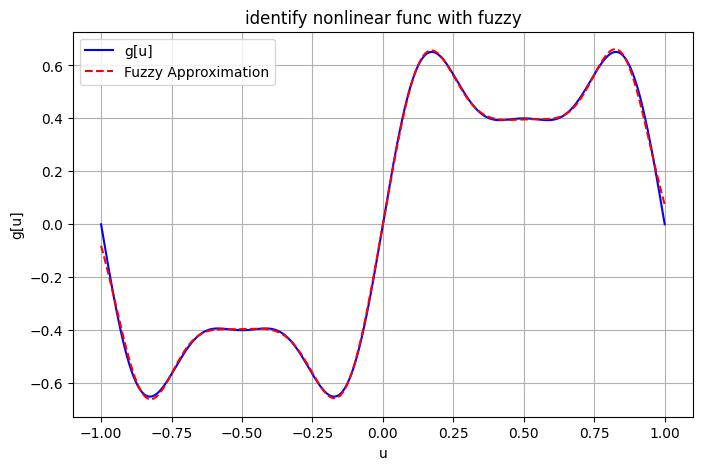

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# تولید داده‌های ورودی در بازه [-1, 1]
u_values = np.linspace(-1, 1, 500)  # افزایش تعداد نقاط نمونه‌برداری برای دقت بالاتر

# محاسبه مقدار g[u]
def g(u):
    return 0.6 * np.sin(np.pi * u) + 0.3 * np.sin(3 * np.pi * u) + 0.1 * np.sin(5 * np.pi * u)

g_values = g(u_values)

# تعریف توابع عضویت گاوسی
def gaussian(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# افزایش تعداد قوانین فازی و بهینه‌سازی توابع عضویت
M = 15  # افزایش تعداد قوانین فازی برای پوشش بهتر غیرخطیت‌ها
centers = np.linspace(-1, 1, M)  # تنظیم مراکز توابع عضویت
sigma = 0.1  # کاهش مقدار انحراف معیار برای دقت بالاتر در مناطق پیچیده‌تر

# محاسبه مقدار توابع عضویت
membership_values = np.array([gaussian(u_values, mu, sigma) for mu in centers])

# محاسبه خروجی مدل فازی
def fuzzy_model(params, u_values):
    num = np.sum(params[:, None] * membership_values, axis=0)
    denom = np.sum(membership_values, axis=0)
    return num / (denom + 1e-10)  # مقدار کوچک‌تر برای جلوگیری از تقسیم بر صفر

# تابع خطا برای بهینه‌سازی
def error(params):
    return np.mean(np.abs(g_values - fuzzy_model(params, u_values)))  # استفاده از میانگین قدر مطلق خطا (MAE) برای حساسیت کمتر به نویز

# مقداردهی اولیه ضرایب مدل فازی
initial_params = np.random.uniform(-1, 1, M)  # مقداردهی اولیه بهینه‌تر برای سرعت همگرایی بهتر

# استفاده از الگوریتم بهینه‌سازی minimize
result = minimize(error, initial_params, method='L-BFGS-B', options={'maxiter': 1500})
optimized_params = result.x

# نمایش خروجی مدل فازی
fuzzy_output = fuzzy_model(optimized_params, u_values)

plt.figure(figsize=(8, 5))
plt.plot(u_values, g_values, label='g[u]', color='b')
plt.plot(u_values, fuzzy_output, label='Fuzzy Approximation', linestyle='--', color='r')
plt.xlabel('u')
plt.ylabel('g[u]')
plt.title('identify nonlinear func with fuzzy')
plt.legend()
plt.grid()
plt.show()
